## Check GPU Availability

In [1]:
!nvidia-smi

Sat Sep  6 07:14:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()

## Dependencies

In [3]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 88.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 92.0 MB/s eta 0:00:00


In [4]:
from roboflow import Roboflow

rf = Roboflow(api_key="yvSeyFmKz5KLX6qUNbl4")
project = rf.workspace("dandata").project("security_surveillance")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Security_Surveillance-1 in yolov8:: 100%|██████████| 10924/10924 [00:02<00:00, 5317.39it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


In [5]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [6]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [7]:
!cat {dataset.location}/data.yaml

names:
- '-'
- Creeping
- \
- crawling
- crawling_with_weapon
- crouching
- crouching_with_weapon
- cycling
- motor_bike
- walking
- walking_with_weapon
nc: 11
roboflow:
  license: Public Domain
  project: security_surveillance
  url: https://universe.roboflow.com/dandata/security_surveillance/dataset/1
  version: 1
test: ../test/images
train: ../train/images
val: ../valid/images


## YOLOv8

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8x.pt")

results = model.train(data=f'{dataset.location}/data.yaml', epochs=10)

100%|██████████| 131M/131M [00:01<00:00, 121MB/s]


New https://pypi.org/project/ultralytics/8.3.194 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Security_Surveillance-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.26M/5.26M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/Security_Surveillance-1/train/labels... 4914 images, 30 backgrounds, 0 corrupt: 100%|██████████| 4914/4914 [00:02<00:00, 2210.37it/s]


train: New cache created: /content/Security_Surveillance-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Security_Surveillance-1/valid/labels... 303 images, 6 backgrounds, 0 corrupt: 100%|██████████| 303/303 [00:00<00:00, 1571.37it/s]


val: New cache created: /content/Security_Surveillance-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      13.2G      1.289      2.115      1.305         14        640: 100%|██████████| 308/308 [06:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.04s/it]

                   all        303        949      0.427       0.66       0.48      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10        13G      1.362      1.781       1.37         11        640: 100%|██████████| 308/308 [06:24<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]

                   all        303        949      0.421      0.621      0.471      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      13.2G      1.344      1.689       1.36         21        640: 100%|██████████| 308/308 [06:22<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]

                   all        303        949      0.476      0.633      0.496      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10        13G      1.293      1.578      1.328         10        640: 100%|██████████| 308/308 [06:22<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]

                   all        303        949      0.483      0.689      0.536      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10        13G      1.213      1.442      1.278          4        640: 100%|██████████| 308/308 [06:21<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]

                   all        303        949      0.518       0.76      0.649      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10        13G      1.134      1.319      1.231          9        640: 100%|██████████| 308/308 [06:22<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]

                   all        303        949      0.529      0.719      0.651      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10        13G      1.079      1.211      1.191          9        640: 100%|██████████| 308/308 [06:21<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]

                   all        303        949      0.571      0.757      0.711      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10        13G       1.02      1.112      1.157          6        640: 100%|██████████| 308/308 [06:21<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]

                   all        303        949      0.685       0.75      0.773      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10        13G     0.9602      1.012      1.121         12        640: 100%|██████████| 308/308 [06:22<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]

                   all        303        949       0.68      0.784       0.78       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10        13G     0.9181     0.9167      1.095         10        640: 100%|██████████| 308/308 [06:22<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]

                   all        303        949      0.736      0.789      0.828      0.686



10 epochs completed in 1.128 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,134,161 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


                   all        303        949      0.736      0.789      0.828      0.686
              crawling        136        188      0.676      0.878      0.803      0.671
  crawling_with_weapon        108        147       0.79      0.803      0.863      0.752
             crouching        104        130      0.688      0.846      0.822       0.71
 crouching_with_weapon         99        146      0.809      0.801      0.909      0.801
               walking         94        122      0.673      0.566      0.682      0.507
   walking_with_weapon        128        216       0.78      0.843      0.889      0.674
Speed: 0.2ms preprocess, 26.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train

args.yaml					   results.png
confusion_matrix_normalized.png			   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1757143088.686677d4d1b2.488.0  train_batch2.jpg
F1_curve.png					   val_batch0_labels.jpg
labels_correlogram.jpg				   val_batch0_pred.jpg
labels.jpg					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights


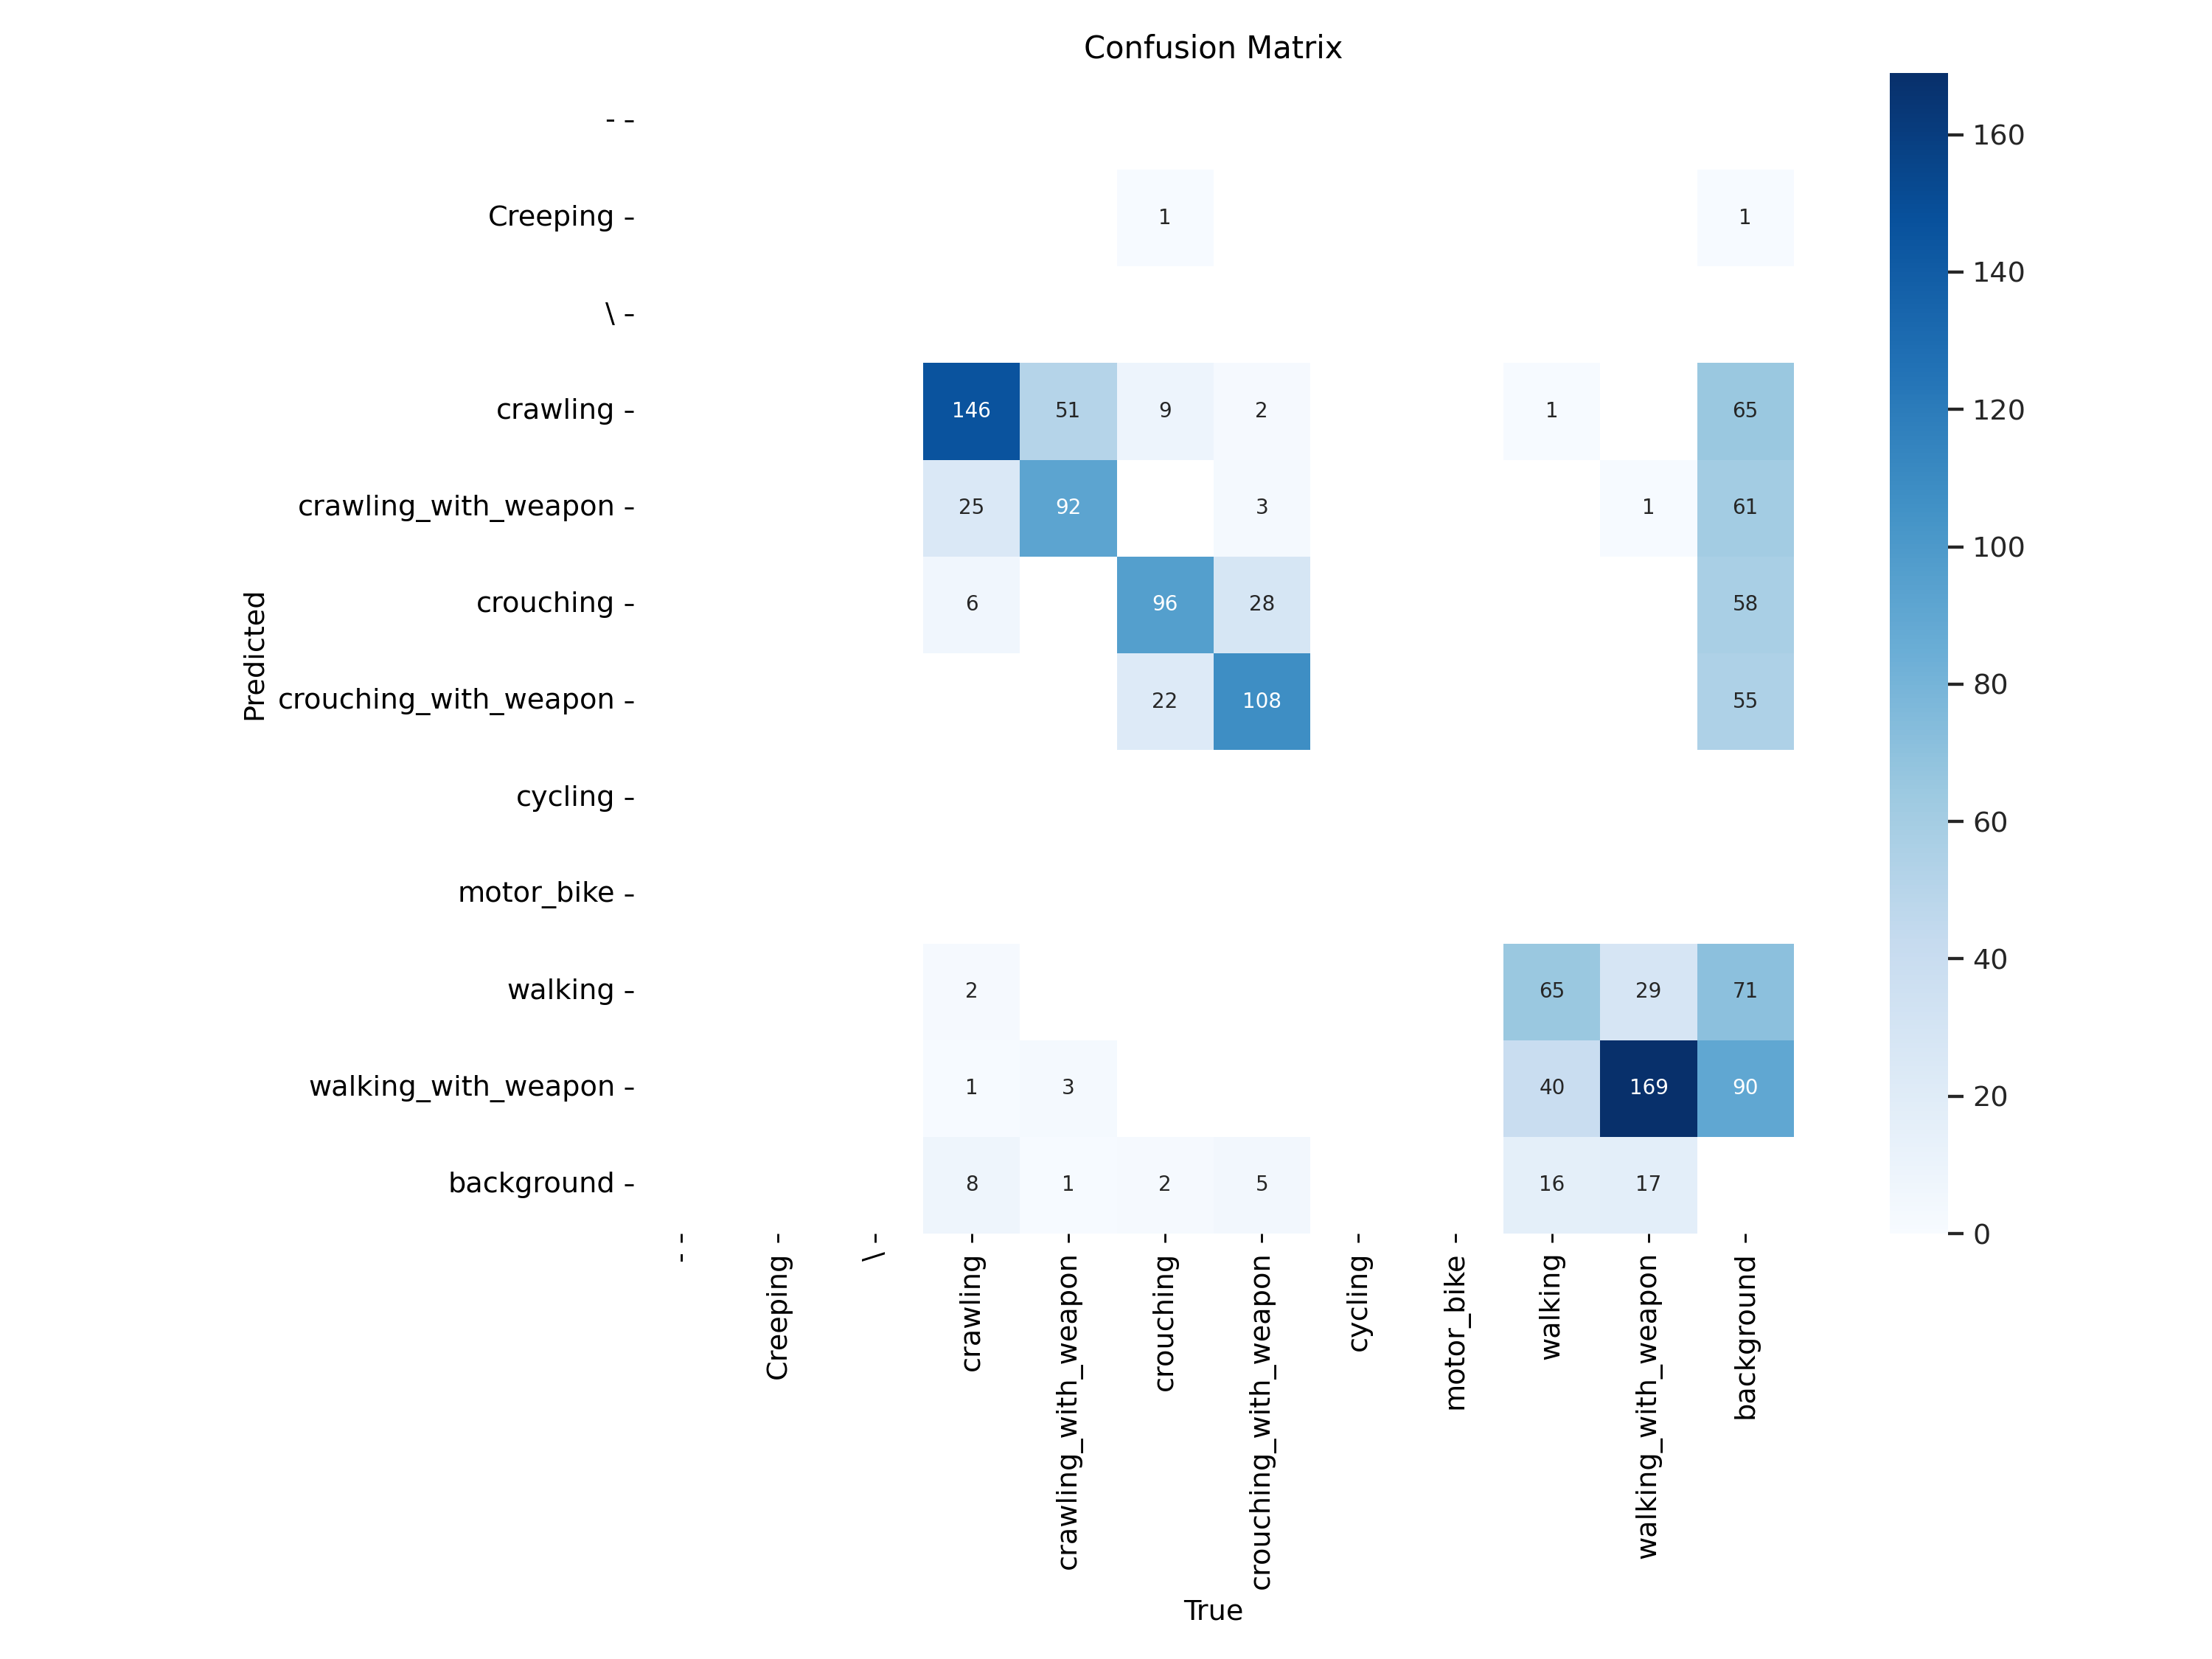

In [10]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

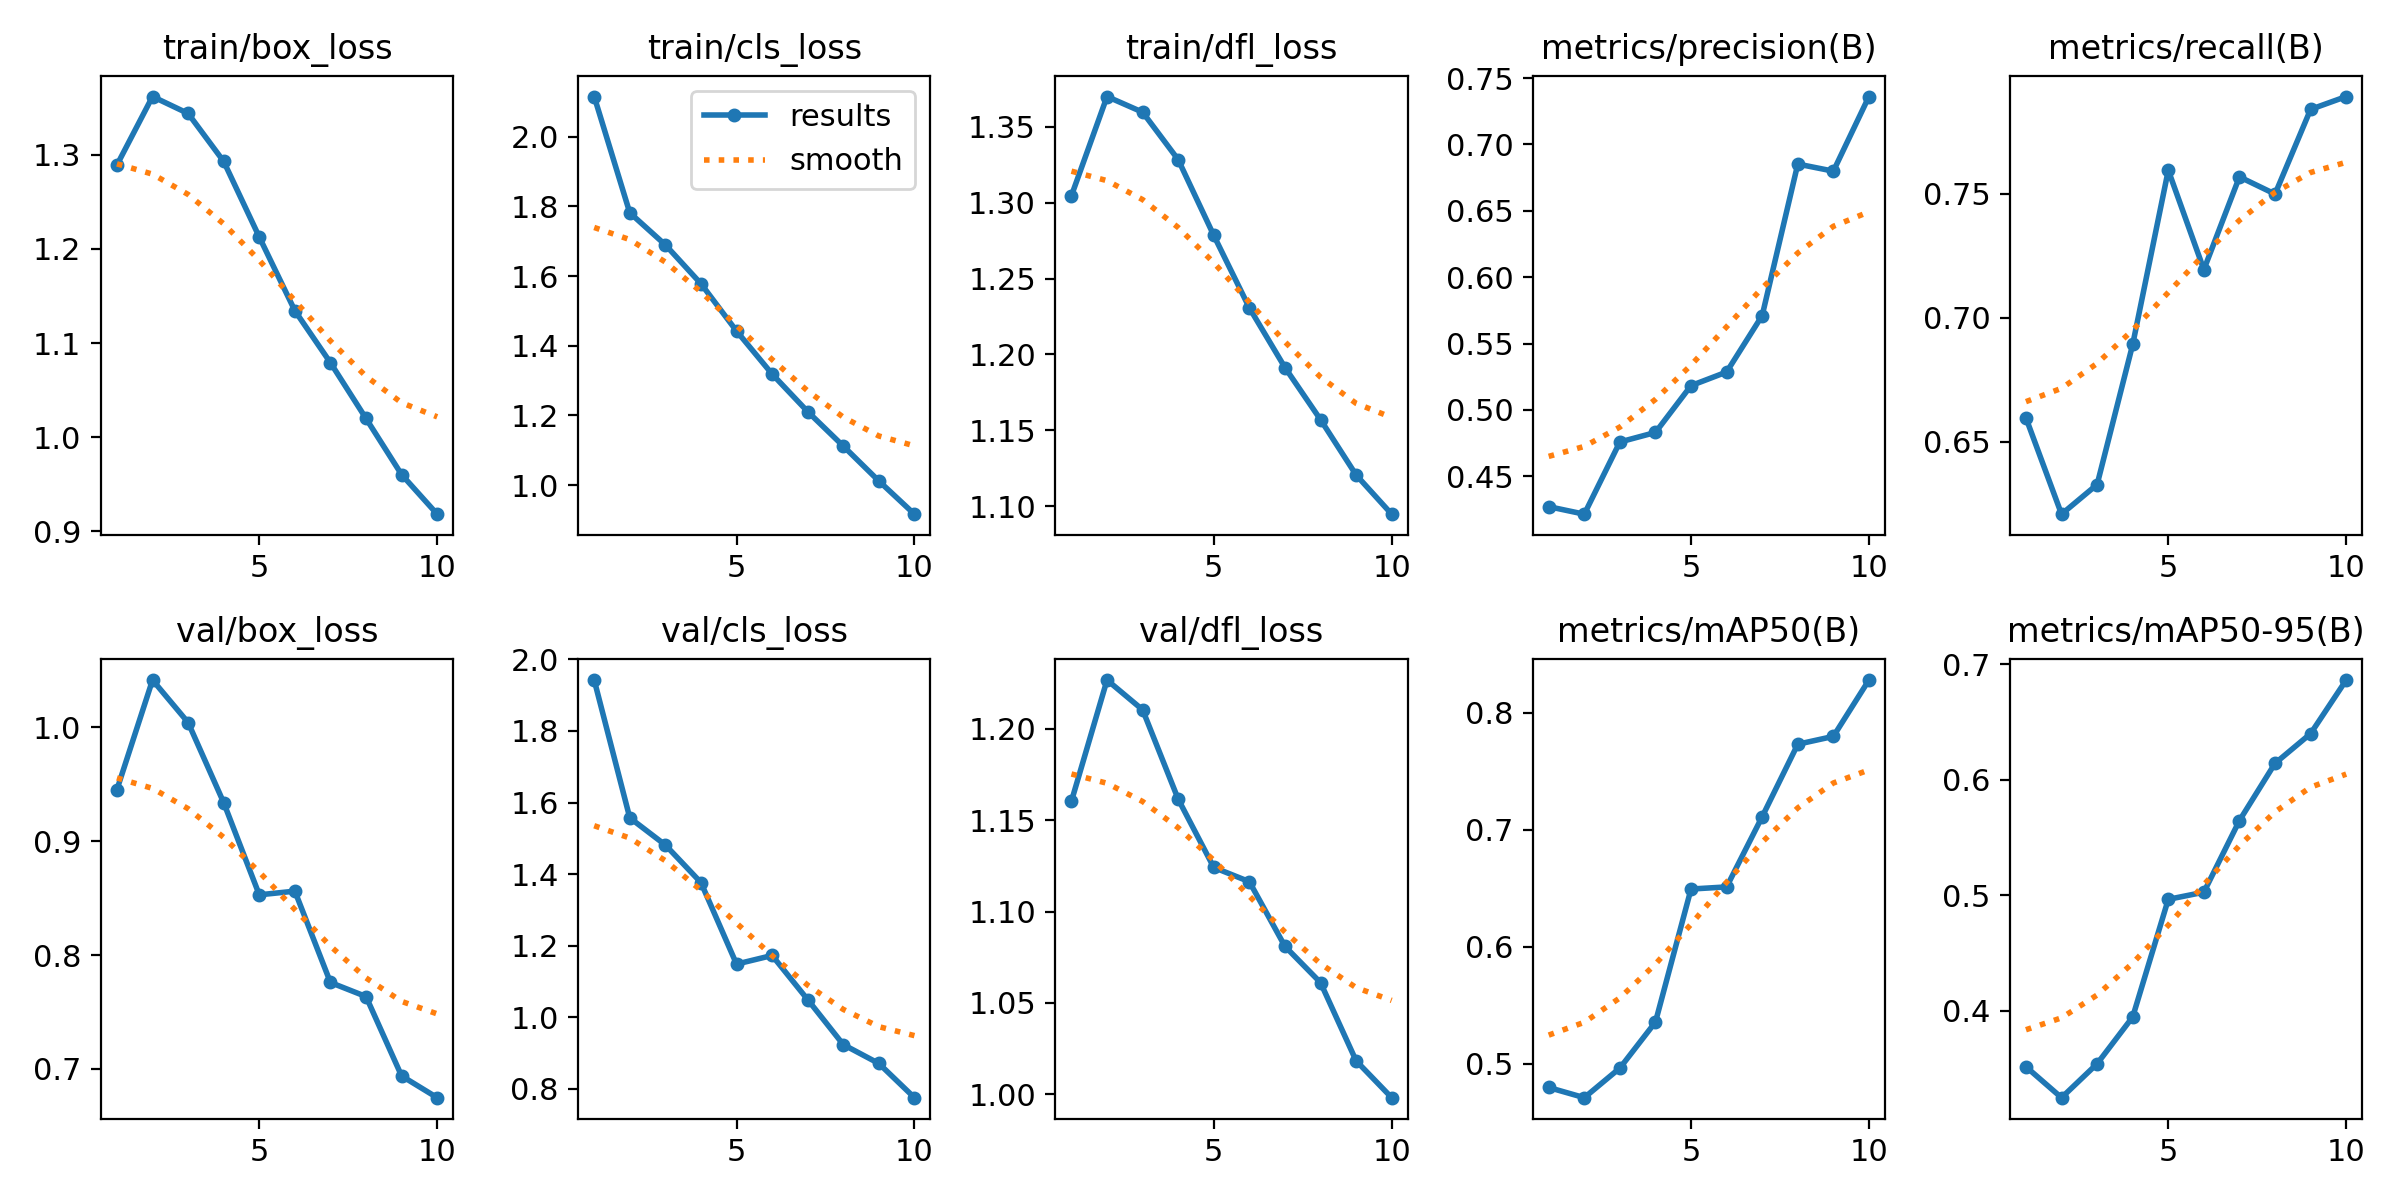

In [11]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

In [12]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['-',
 'Creeping',
 '\\',
 'crawling',
 'crawling_with_weapon',
 'crouching',
 'crouching_with_weapon',
 'cycling',
 'motor_bike',
 'walking',
 'walking_with_weapon']

In [13]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f"/{HOME}/runs/detect/train/weights/best.pt")

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [14]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.6567836495619719
mAP 50 0.7783547526781743
mAP 75 0.7342580961580273


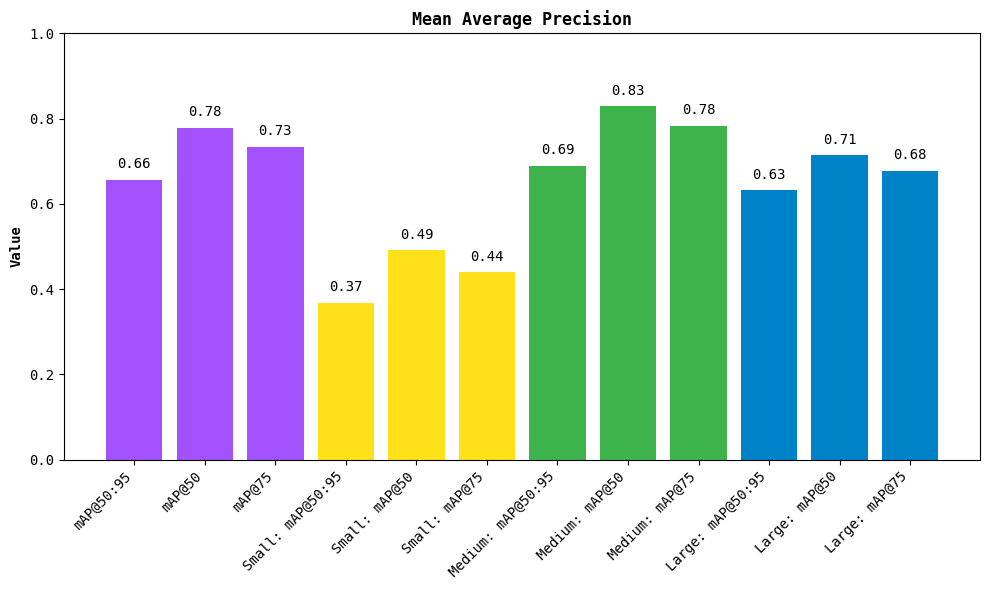

In [15]:
map.plot()

In [16]:
import supervision as sv

model = YOLO("/content/runs/detect/train/weights/best.pt")

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml")

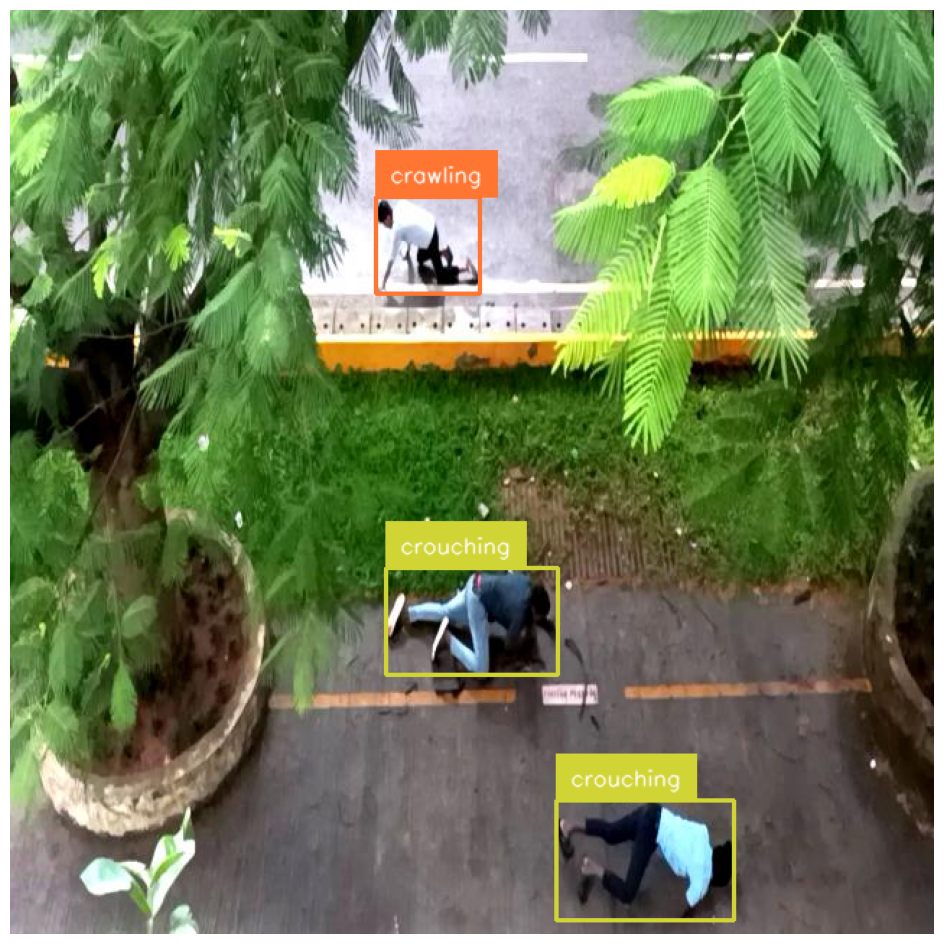

In [17]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)